In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [57]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [58]:
df1 = df.drop(["loan_id"],axis=1)
df1.head()

no_of_dependents      education  self_employed   income_annum  \
0                  2       Graduate             No        9600000   
1                  0   Not Graduate            Yes        4100000   
2                  3       Graduate             No        9100000   
3                  3       Graduate             No        8200000   
4                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [59]:
df1.describe()

no_of_dependents   income_annum   loan_amount    loan_term  \
count        4269.000000   4.269000e+03  4.269000e+03  4269.000000   
mean            2.498712   5.059124e+06  1.513345e+07    10.900445   
std             1.695910   2.806840e+06  9.043363e+06     5.709187   
min             0.000000   2.000000e+05  3.000000e+05     2.000000   
25%             1.000000   2.700000e+06  7.700000e+06     6.000000   
50%             3.000000   5.100000e+06  1.450000e+07    10.000000   
75%             4.000000   7.500000e+06  2.150000e+07    16.000000   
max             5.000000   9.900000e+06  3.950000e+07    20.000000   

        cibil_score   residential_assets_value   commercial_assets_value  \
count   4269.000000               4.269000e+03              4.269000e+03   
mean     599.936051               7.472617e+06              4.973155e+06   
std      172.430401               6.503637e+06              4.388966e+06   
min      300.000000              -1.000000e+05              0.000000e+00   
25%      453.000000               2.200000e+06              1.300000e+06   
50%      600.000000               5.600000e+06              3.700000e+06   
75%      748.000000               1.130000e+07              7.600000e+06   
max      900.000000               2.910000e+07              1.940000e+07   

        luxury_assets_value   bank_asset_value  
count          4.269000e+03       4.269000e+03  
mean           1.512631e+07       4.976692e+06  
std            9.103754e+06       3.250185e+06  
min            3.000000e+05       0.000000e+00  
25%            7.500000e+06       2.300000e+06  
50%            1.460000e+07       4.600000e+06  
75%            2.170000e+07       7.100000e+06  
max            3.920000e+07       1.470000e+07

In [60]:
df1.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [72]:
df1.columns = ['No. Dependents', 'Education', 'Employment Status', 'Income', 'Loan Amount', 'Loan Term', 'Cibil Score','Residential Assets', 'Commercial Assets', 'Luxury Assets','Bank Assets','Status']
df1.head()

No. Dependents      Education Employment Status   Income  Loan Amount  \
0               2       Graduate                No  9600000     29900000   
1               0   Not Graduate               Yes  4100000     12200000   
2               3       Graduate                No  9100000     29700000   
3               3       Graduate                No  8200000     30700000   
4               5   Not Graduate               Yes  9800000     24200000   

   Loan Term  Cibil Score  Residential Assets  Commercial Assets  \
0         12          778             2400000           17600000   
1          8          417             2700000            2200000   
2         20          506             7100000            4500000   
3          8          467            18200000            3300000   
4         20          382            12400000            8200000   

   Luxury Assets  Bank Assets     Status  
0       22700000      8000000   Approved  
1        8800000      3300000   Rejected  
2       33300000     12800000   Rejected  
3       23300000      7900000   Rejected  
4       29400000      5000000   Rejected

<Axes: xlabel='Loan Term', ylabel='count'>

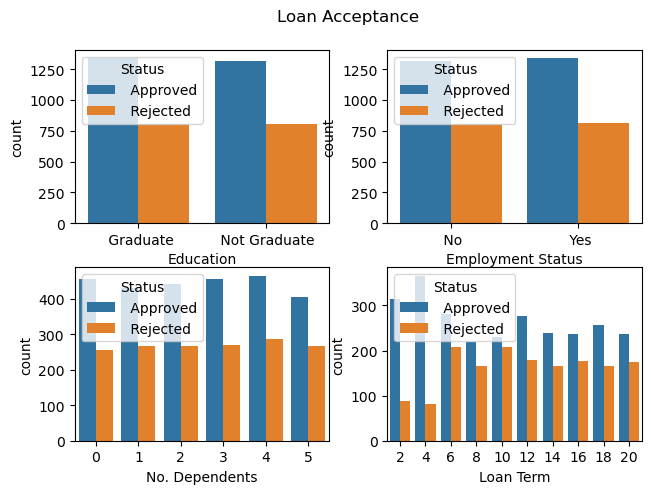

In [83]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Loan Acceptance')
fig.tight_layout()
sns.countplot(ax=axs[0,0], x = df1["Education"], hue=df1["Status"])
sns.countplot(ax=axs[0,1], x = df1["Employment Status"], hue=df1["Status"])
sns.countplot(ax=axs[1,0], x = df1["No. Dependents"], hue=df1["Status"])
sns.countplot(ax=axs[1,1], x = df1["Loan Term"], hue=df1["Status"])

As can be seen from the table, the higher the loan term the more likely it is for the loan to be rejected while in other feature the approval rates seems to always be significantly higher than the rejected rates.

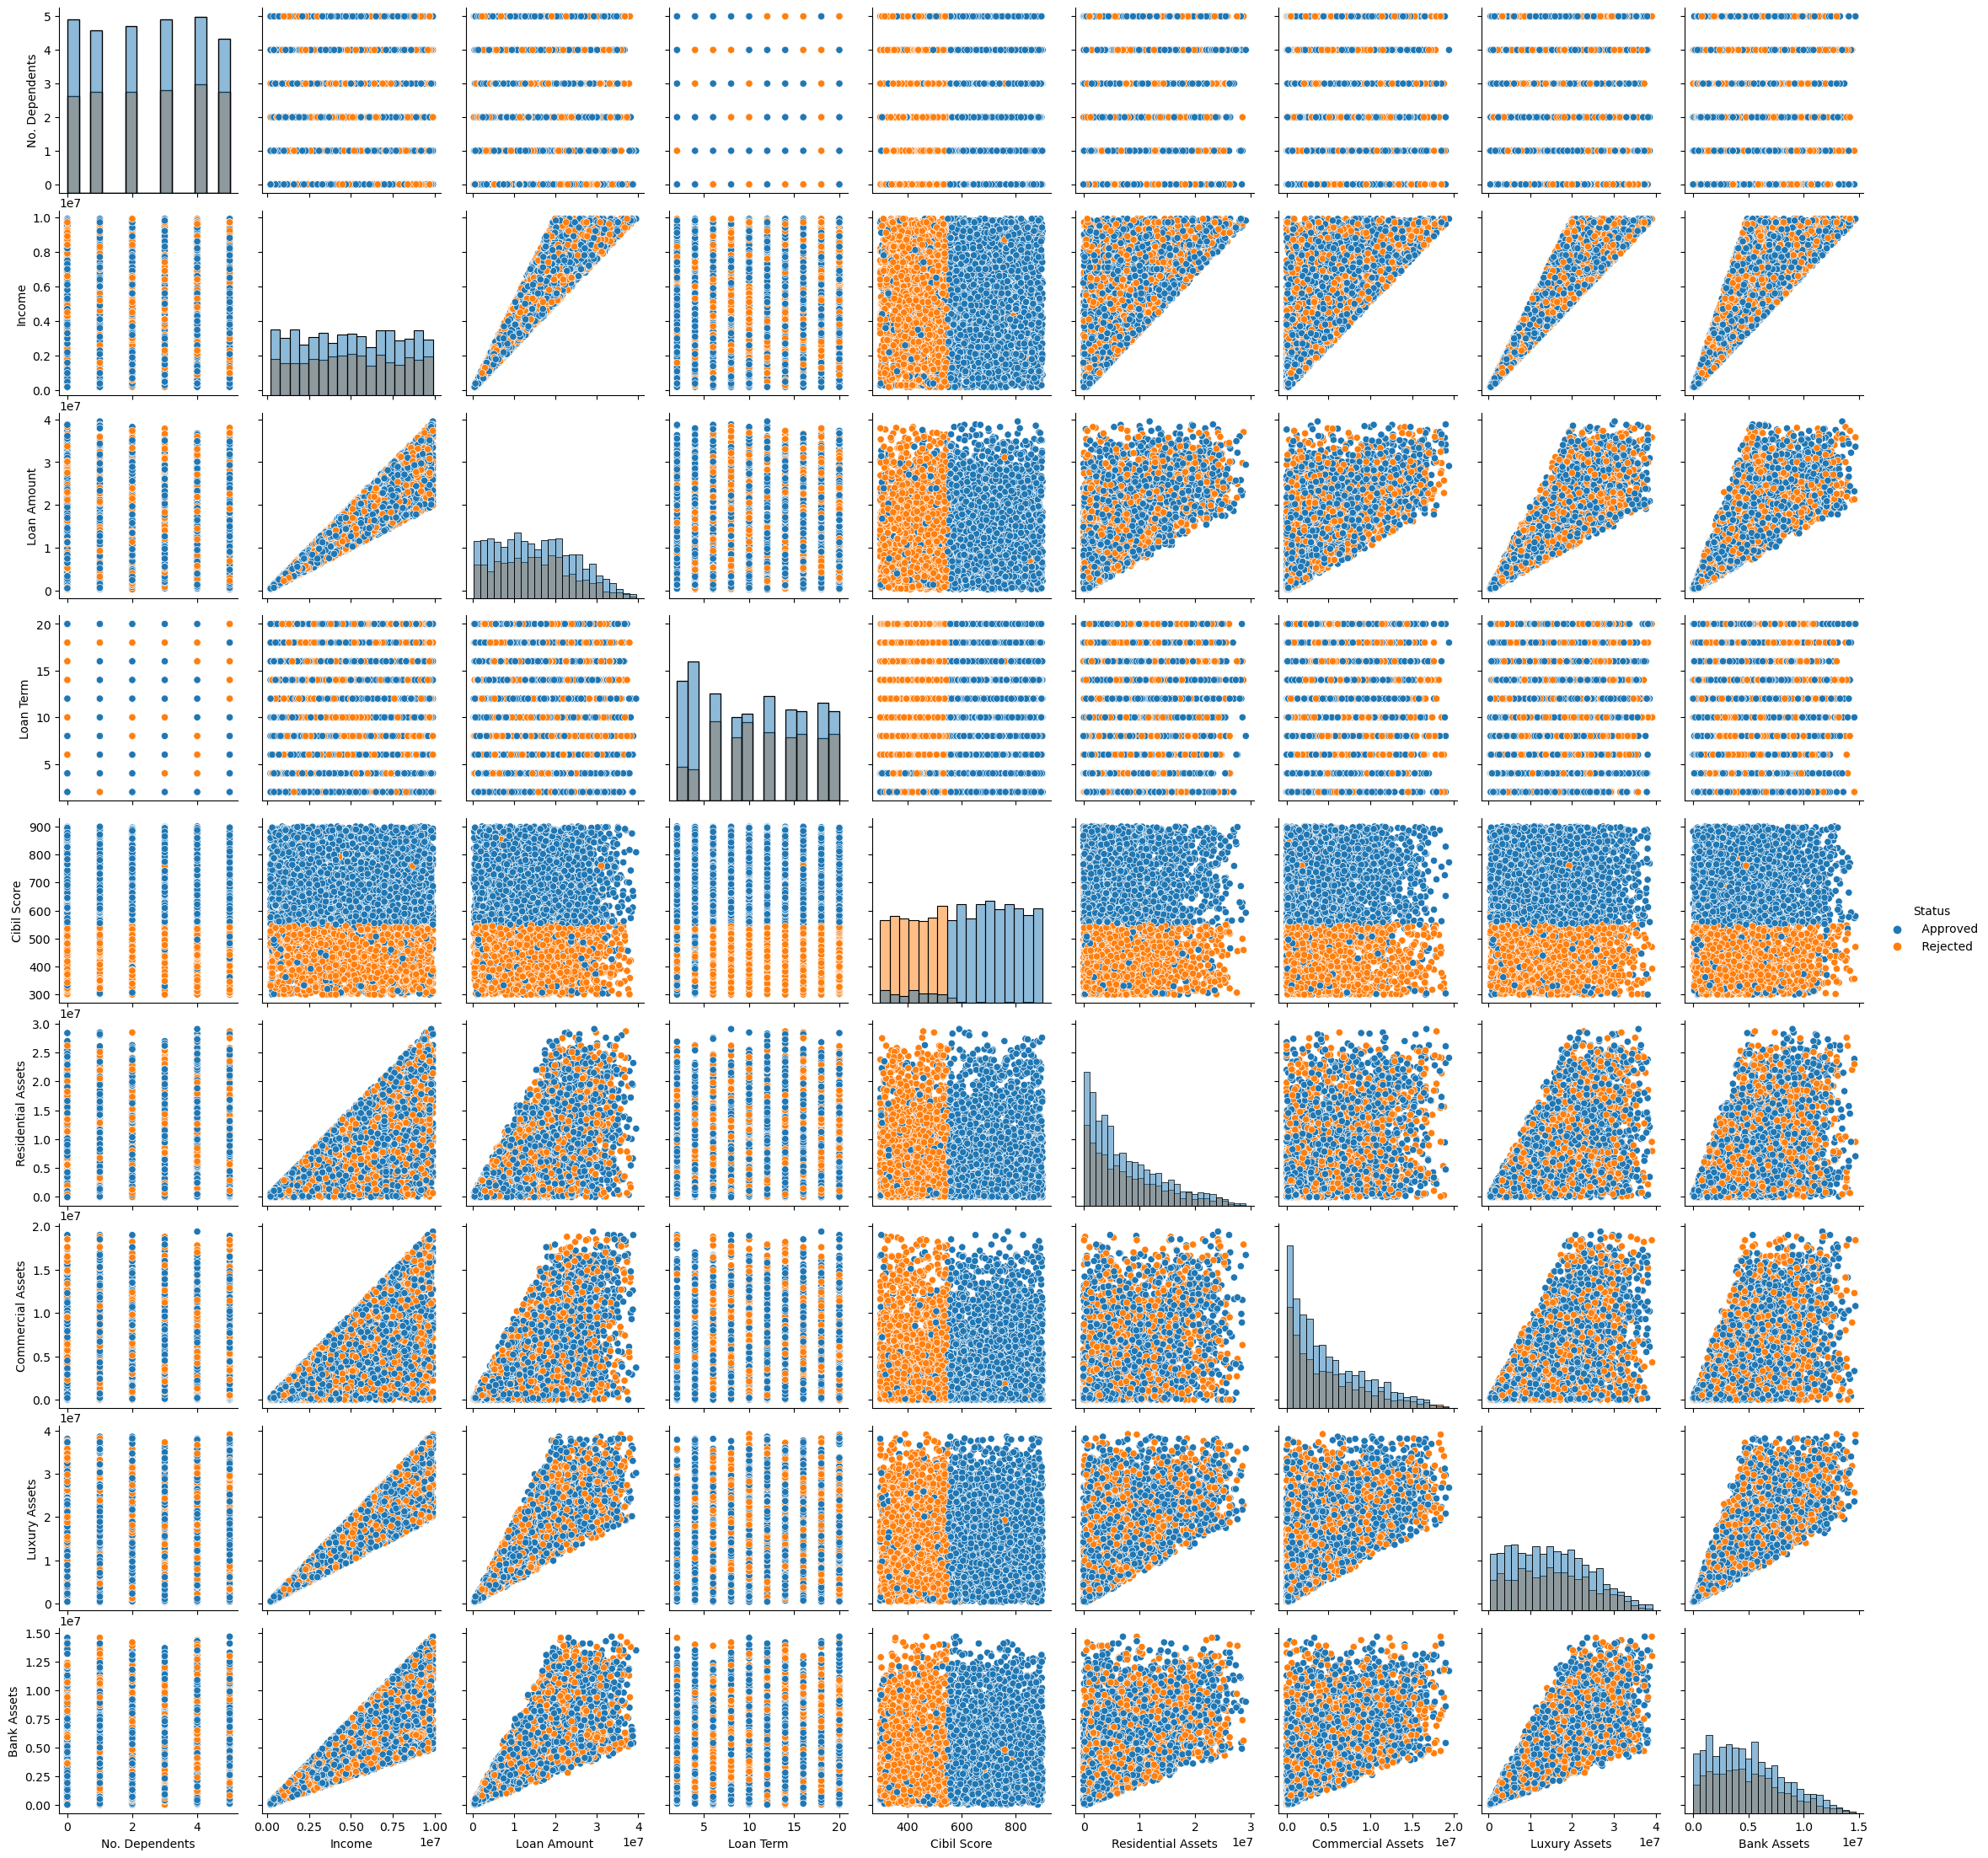

In [84]:
g = sns.PairGrid(df1, hue="Status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

It seems that cibil score scales very well with approved loan status as cibil score higher than around 600 will result in loan approval otherwise there is no other correlation with other features.

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Education'] = le.fit_transform(df1['Education'])
df1['Employment Status'] = le.fit_transform(df1['Employment Status'])
df1['Status'] = le.fit_transform(df1['Status'])
df1.head()

No. Dependents  Education  Employment Status   Income  Loan Amount  \
0               2          0                  0  9600000     29900000   
1               0          1                  1  4100000     12200000   
2               3          0                  0  9100000     29700000   
3               3          0                  0  8200000     30700000   
4               5          1                  1  9800000     24200000   

   Loan Term  Cibil Score  Residential Assets  Commercial Assets  \
0         12          778             2400000           17600000   
1          8          417             2700000            2200000   
2         20          506             7100000            4500000   
3          8          467            18200000            3300000   
4         20          382            12400000            8200000   

   Luxury Assets  Bank Assets  Status  
0       22700000      8000000       0  
1        8800000      3300000       1  
2       33300000     12800000       1  
3       23300000      7900000       1  
4       29400000      5000000       1

In [89]:
X = df1.iloc[:,:11]
X.head()

No. Dependents  Education  Employment Status   Income  Loan Amount  \
0               2          0                  0  9600000     29900000   
1               0          1                  1  4100000     12200000   
2               3          0                  0  9100000     29700000   
3               3          0                  0  8200000     30700000   
4               5          1                  1  9800000     24200000   

   Loan Term  Cibil Score  Residential Assets  Commercial Assets  \
0         12          778             2400000           17600000   
1          8          417             2700000            2200000   
2         20          506             7100000            4500000   
3          8          467            18200000            3300000   
4         20          382            12400000            8200000   

   Luxury Assets  Bank Assets  
0       22700000      8000000  
1        8800000      3300000  
2       33300000     12800000  
3       23300000      7900000  
4       29400000      5000000

In [90]:
y = df1.iloc[:,11:12]
y.head()

Status
0       0
1       1
2       1
3       1
4       1

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9831460674157303